In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedLocator, FixedFormatter

In [81]:
topics = pd.read_csv("../data/topics_labeled.csv")
interactions = pd.read_csv("../data/interactions_with_topic_probs.csv")
political_topics = topics.loc[topics["Politics"]==1, "Name"].to_list()
personality_topics = topics.loc[topics["Personality"]==1, "Name"].to_list()

interactions["politics_queries"] = interactions[political_topics].sum(axis=1)
interactions["personality_queries"] = interactions[personality_topics].sum(axis=1)
user_topics_bert = interactions.groupby(["user_id"])[["politics_queries", "personality_queries"]].mean()

In [83]:
df = pd.read_csv("../data/survey_results.csv")
zero_shot = df[df["context"]==0].copy()
zero_shot = zero_shot.rename(columns={"mimesis": "mimesis_zero_shot"})
with_context = df[df["context"]==1].copy()
with_context = with_context.rename(columns={"mimesis": "mimesis_with_context"})
zero_shot = zero_shot.drop(columns=["context"])
with_context = with_context.drop(columns=["context"])
df = zero_shot.merge(with_context, on=["model", "task", "participant", "prompt_id", "gender", "political_lean", "understanding"], how="outer")
df["mimesis_change"] = df["mimesis_with_context"] - df["mimesis_zero_shot"]

df["user_id"] = df["participant"]
df["is_man"] = (df["gender"]=="man").astype(int)
df["is_liberal"] = (df["political_lean"].isin(["Liberal", "Very Liberal"])).astype(int)
df = df[["mimesis_change", "understanding", "user_id", "model", "task", "prompt_id", "is_man", "is_liberal"]]
df["prompt_id"] = df["prompt_id"].str.replace("-", "_")
df.to_csv("../data/regression/mimesis_change.csv", index=False)

In [79]:
df = pd.read_csv("../data/survey_results.csv")
df["user_id"] = df["participant"]

df["understanding"] = df["understanding"] - 3
df["with_context"] = df["context"]
df.loc[df["with_context"]==0, "understanding"] = 0
df.loc[df["with_context"]==0, "gender"] = np.nan
df.loc[df["with_context"]==0, "political_lean"] = np.nan

df["is_man"] = (df["gender"]=="man").astype(int)
df["is_woman"] = (df["gender"]=="woman").astype(int)
df["has_left_politics"] = (df["political_lean"].isin(["Liberal", "Very Liberal"])).astype(int)
df["has_right_politics"] =(df["political_lean"].isin(["Moderate", "Conservative", "Very Conservative"])).astype(int)

df = df.merge(user_topics_bert, on="user_id", how="left")

df["prompt_id"] = df["prompt_id"].str.replace("aita-", "Scenario: ")
df["prompt_id"] = df["prompt_id"].str.replace("politics-", "Topic: ")
df["prompt_id"] = df["prompt_id"].str.replace("-", " ")

df = df[["mimesis", "understanding", "with_context", "user_id", "model", "task", "prompt_id", "is_man", "is_woman", "has_left_politics", "has_right_politics", "politics_queries", "personality_queries"]]
df.to_csv("../data/regression/mimesis.csv", index=False)

In [86]:
df = pd.read_csv("../data/survey_results.csv")
df["user_id"] = df["participant"]

df["understanding"] = df["understanding"] - 3
df["with_context"] = df["context"]
df.loc[df["with_context"]==0, "understanding"] = 0
df.loc[df["with_context"]==0, "gender"] = np.nan
df.loc[df["with_context"]==0, "political_lean"] = np.nan

df["is_man"] = (df["gender"]=="man").astype(int)
df["is_woman"] = (df["gender"]=="woman").astype(int)
df["has_left_politics"] = (df["political_lean"].isin(["Liberal", "Very Liberal"])).astype(int)
df["has_right_politics"] =(df["political_lean"].isin(["Moderate", "Conservative", "Very Conservative"])).astype(int)

df = df[["mimesis", "understanding", "with_context", "user_id", "model", "task", "prompt_id", "is_man", "is_woman", "has_left_politics", "has_right_politics"]]

interactions = pd.read_csv("../data/interactions_with_topic_probs.csv")
interactions = interactions.drop(columns=['timestamp', 'input', 'output', 'tokens', 'combined',
       'assigned_topic'])

interactions = interactions.groupby(["user_id"]).mean().reset_index()
df = df.merge(interactions, on="user_id", how="left")

df["prompt_id"] = df["prompt_id"].str.replace("aita-", "Scenario: ")
df["prompt_id"] = df["prompt_id"].str.replace("politics-", "Topic: ")
df["prompt_id"] = df["prompt_id"].str.replace("-", " ")

df.to_csv("../data/regression/mimesis_topics.csv", index=False)

In [87]:
df.columns

Index(['mimesis', 'understanding', 'with_context', 'user_id', 'model', 'task',
       'prompt_id', 'is_man', 'is_woman', 'has_left_politics',
       'has_right_politics', '0_email_thank_casual_formal',
       '1_welcome_youre_im_day', '2_water_clean_dry_coffee',
       '3_personality_psychology_traits_slides', '4_credit_card_income_bank',
       '5_clients_emotions_profile_therapy', '6_animals_snakes_species_birds',
       '7_light_gravitational_particles_gases',
       '8_sperm_genetic_conservation_art', '9_chapter_adam_eve_god',
       '10_today_hello_assist_hey', '11_control_pid_vibration_controller',
       '12_occured_generating_sorry_error', '13_music_rihanna_public_oprah',
       '14_redox_cece_nutrient_spitskop', '15_nfl_product_smoother_ranking',
       '16_cutadapt_multiqc_path_conda', '17_regret_feel_feelings_feeling',
       '18_beans_rice_sauce_pie',
       '19_infrastructure_environmental_sustainable_construction',
       '20_republic_countries_united_births', '21_rhel7pu

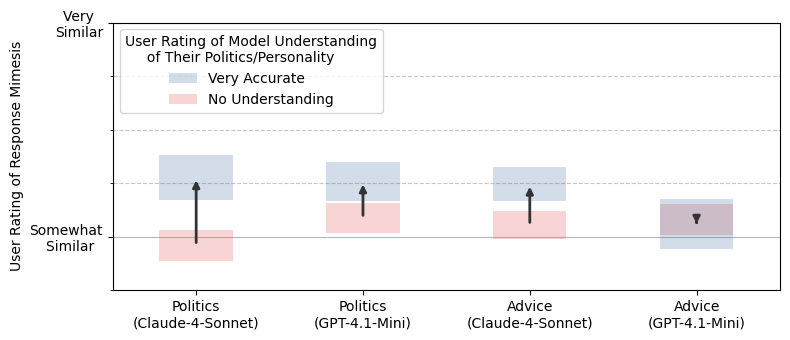

In [72]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter, MultipleLocator
from matplotlib.patches import Rectangle, Patch

categories = ["Politics\n(Claude-4-Sonnet)", "Politics\n(GPT-4.1-Mini)",
              "Advice\n(Claude-4-Sonnet)", "Advice\n(GPT-4.1-Mini)"]

# (start, end)
arrows = [(2.958871, 3.276227),
          (3.085915, 3.256834),
          (3.053055, 3.246056),
          (3.08036,  3.059757)]

# SE values (per row)
se_start = [0.072289, 0.070605, 0.064834, 0.072205]
se_end   = [0.104060, 0.091402, 0.079658, 0.116181]

fig, ax = plt.subplots(figsize=(8, 3.5))

# Width of shaded SE boxes
box_width = 0.44
start_color = "#E45756"  # muted teal
end_color   = "#4C78A8"  # soft coral
alpha = 0.25

for i, ((start, end), se_s, se_e) in enumerate(zip(arrows, se_start, se_end)):
    # Start SE box
    rect_start = Rectangle((i - box_width/2, start - se_s), box_width, 2*se_s,
                           facecolor=start_color, edgecolor='none', alpha=alpha, zorder=1)
    ax.add_patch(rect_start)
    # End SE box
    rect_end = Rectangle((i - box_width/2, end - se_e), box_width, 2*se_e,
                         facecolor=end_color, edgecolor='none', alpha=alpha, zorder=1)
    ax.add_patch(rect_end)

    # Arrow
    ax.annotate(
        "",
        xy=(i, end),
        xytext=(i, start),
        arrowprops=dict(arrowstyle="-|>", lw=2, color='0.2'),
        zorder=2
    )

ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)

major_locs = [1, 2, 3, 4]
major_labels = ["Very\nDissimilar", "Somewhat\nDissimilar", "Somewhat\nSimilar  ", "Very  \nSimilar"]
ax.yaxis.set_major_locator(FixedLocator(major_locs))
ax.yaxis.set_major_formatter(FixedFormatter(major_labels))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))

ax.set_axisbelow(True)
ax.grid(True, which="major", axis="y", linestyle="-", alpha=0.9)
ax.grid(True, which="minor", axis="y", linestyle="--", alpha=0.7)

ax.set_xlim(-0.5, len(categories) - 0.5)
ax.set_ylim(2.75, 4)
ax.set_ylabel("User Rating of Response Mimesis")

handles = [
    Patch(facecolor=end_color,   alpha=alpha, label="Very Accurate"),
    Patch(facecolor=start_color, alpha=alpha, label="No Understanding"),
]
ax.legend(handles=handles, loc="upper left", frameon=True, title="User Rating of Model Understanding\n     of Their Politics/Personality")

plt.tight_layout()
plt.savefig("figures/mimesis_effects.jpg", dpi=300, bbox_inches="tight")
plt.show()





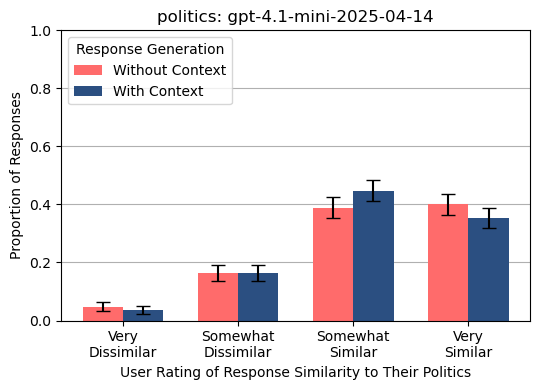

In [73]:
df = pd.read_csv("../data/survey_results.csv")
TASK = "politics"
MODEL = "gpt-4.1-mini-2025-04-14"
#MODEL = "claude-sonnet-4-20250514"
df = df[df["task"]==TASK]
df = df[df["model"]==MODEL]

mimesis_labels = {
    1: "Very\nDissimilar",
    2: "Somewhat\nDissimilar",
    3: "Somewhat\nSimilar",
    4: "Very\nSimilar"
}
df['mimesis_label'] = df['mimesis'].map(mimesis_labels)
# Get counts
counts = df.groupby(['mimesis_label', 'context']).size().unstack(fill_value=0)

# Reorder labels
ordered_labels = ["Very\nDissimilar", "Somewhat\nDissimilar", "Somewhat\nSimilar", "Very\nSimilar"]
counts = counts.reindex(ordered_labels)

# Total per context group (needed for proportions and SE)
totals = counts.sum()

# Compute proportions
proportions = counts.div(totals)

# Compute standard errors for binomial proportions: SE = sqrt(p * (1 - p) / n)
se = np.sqrt(proportions * (1 - proportions) / totals)

# Plot
fig, ax = plt.subplots(figsize=(5.5, 4))
bar_width = 0.35
x = np.arange(len(proportions))

# Plot each bar with error bars
ax.bar(x - bar_width/2, proportions[0], width=bar_width, yerr=se[0], capsize=5, label='Without Context', zorder=2, color="#FF6B6B")
ax.bar(x + bar_width/2, proportions[1], width=bar_width, yerr=se[1], capsize=5, label='With Context', zorder=2, color="#2B4F81")

# Formatting
ax.set_ylim(0,1)
ax.set_xticks(x)
ax.set_xticklabels(proportions.index, rotation=0)
xlabel = "User Rating of Response Similarity to Their Politics"
if TASK == "aita":
    xlabel = "User Rating of Response Similarity to Their Perspective"
ax.set_xlabel(xlabel)
ax.set_ylabel('Proportion of Responses')
ax.legend(title="Response Generation", loc="upper left")
ax.set_title(TASK + ": " + MODEL)
plt.gca().yaxis.grid(True, linestyle="-", zorder=1)  # optional readability

plt.tight_layout()
plt.show()

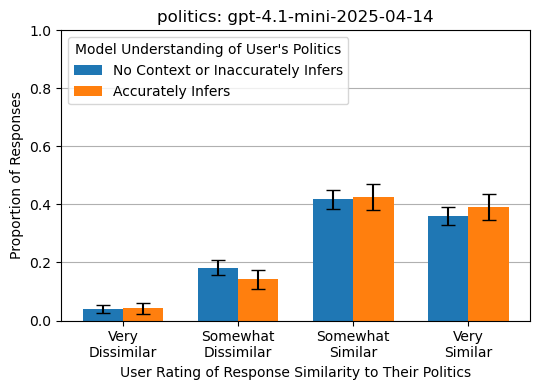

In [10]:
df = pd.read_csv("../data/survey_results.csv")
TASK = "politics"
#MODEL = "claude-sonnet-4-20250514"
MODEL = "gpt-4.1-mini-2025-04-14"
df = df[df["task"]==TASK]
df = df[df["model"]==MODEL]
df["understanding"] = (df["understanding"]>0).astype(int)
mimesis_labels = {
    -1.5: "Very\nDissimilar",
    -0.5: "Somewhat\nDissimilar",
     0.5: "Somewhat\nSimilar",
     1.5: "Very\nSimilar"
}
df['mimesis_label'] = df['mimesis'].map(mimesis_labels)
# Get counts
counts = df.groupby(['mimesis_label', 'understanding']).size().unstack(fill_value=0)

# Reorder labels
ordered_labels = ["Very\nDissimilar", "Somewhat\nDissimilar", "Somewhat\nSimilar", "Very\nSimilar"]
counts = counts.reindex(ordered_labels)

# Total per context group (needed for proportions and SE)
totals = counts.sum()

# Compute proportions
proportions = counts.div(totals)

# Compute standard errors for binomial proportions: SE = sqrt(p * (1 - p) / n)
se = np.sqrt(proportions * (1 - proportions) / totals)

# Plot
fig, ax = plt.subplots(figsize=(5.5, 4))
bar_width = 0.35
x = np.arange(len(proportions))

# Plot each bar with error bars
ax.bar(x - bar_width/2, proportions[0], width=bar_width, yerr=se[0], capsize=5, label='No Context or Inaccurately Infers', zorder=2)
ax.bar(x + bar_width/2, proportions[1], width=bar_width, yerr=se[1], capsize=5, label='Accurately Infers', zorder=2)

# Formatting
ax.set_ylim(0,1)
ax.set_xticks(x)
ax.set_xticklabels(proportions.index, rotation=0)
xlabel = "User Rating of Response Similarity to Their Politics"
if TASK == "aita":
    xlabel = "User Rating of Response Similarity to Their Perspective"
ax.set_xlabel(xlabel)
ax.set_ylabel('Proportion of Responses')
ax.legend(title="Model Understanding of User's Politics", loc="upper left")
ax.set_title(TASK + ": " + MODEL)
plt.gca().yaxis.grid(True, linestyle="-", zorder=1)  # optional readability

plt.tight_layout()
plt.show()